In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from cbrain.imports import *
from cbrain.utils import *
from matplotlib.animation import FuncAnimation
from IPython.display import SVG, HTML, FileLink

/home1/05488/tg847872/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
def gw_avg(ds, var):
    return (ds[var] * ds['gw'].values).mean(dim=('lat', 'lon'))

In [4]:
def animate_lat_lon(a, interval=100, **kwargs):
    fig, ax = plt.subplots(1, 1, figsize=(8,5))
    I = ax.imshow(a[1], **kwargs)
    cb = fig.colorbar(I, ax=ax, shrink=0.7)
    T = ax.set_title(f'Step 1')
    def update(i):
        T.set_text(f'Step {i}')
        I.set_data(a[i])
        return I,
    plt.close(fig)
    return FuncAnimation(fig, update, frames=np.arange(1, a.shape[0]), interval=interval, blit=True)

In [5]:
DATA_DIR = '/scratch/05488/tg847872/cloudbrain_ctrl_aquaplanet_03/'
SP_DIR = '/scratch/05488/tg847872/galen_sp/'
NONSP_DIR = '/scratch/05488/tg847872/galen_nonsp/'

In [6]:
%%time
dcbrain = xr.open_mfdataset(f'{DATA_DIR}*debug41b.cam2.h1*.nc', decode_times=False, decode_cf=False, 
                         data_vars=['TPHYSTND', 'PHQ', 'TAP', 'QAP']); 

CPU times: user 12.3 s, sys: 3.12 s, total: 15.4 s
Wall time: 4min 12s


In [7]:
%%time
dsp = xr.open_mfdataset(f'{SP_DIR}AndKua_aqua_SPCAM3.0_sp.cam2.h1.0000*.nc', decode_times=False, decode_cf=False, 
                         data_vars=['TPHYSTND', 'PHQ', 'TAP', 'QAP']);

CPU times: user 11.2 s, sys: 1.49 s, total: 12.7 s
Wall time: 4min 48s


In [8]:
%%time
dnonsp = xr.open_mfdataset(f'{NONSP_DIR}AndKua_aqua_SPCAM3.0_nonsp_fix.cam2.h1.0000*.nc', decode_times=False, 
                        decode_cf=False, data_vars=['TPHYSTND', 'PHQ', 'TAP', 'QAP']);

CPU times: user 10.1 s, sys: 1.42 s, total: 11.5 s
Wall time: 4min 46s


In [16]:
def plot_comparison(var, t, ds=None, lev=slice(0, None), lon=slice(0, None), **kwargs):
    fig, axes = plt.subplots(1, 3, figsize = (15,4))
    if ds is None: ds = [dcbrain, dsp, dnonsp]
    for ax, d in zip(axes.flat, ds):
        d.isel(lon=lon, lev=lev, time=t)[var].plot(ax=ax, add_colorbar=False, **kwargs)

## Mean state
Ignoring first month of spin-up. Month 2 - 10.

In [10]:
sl = slice(48*30*1, 48*30*10, 48)

In [12]:
len(range(48*30*1, 48*30*10, 48))

270

### Mean T, Q, TPHYSTND, PHQ

In [13]:
def comp_mean(d, var, sl):
    return d[var].isel(time=sl).mean('time')

In [14]:
TAPmeans = [comp_mean(d, 'TAP', sl).compute() for d in [dcbrain, dsp, dnonsp]]

In [26]:
QAPmeans = [comp_mean(d, 'QAP', sl).compute() for d in [dcbrain, dsp, dnonsp]]

In [27]:
TPHYSTNDmeans = [comp_mean(d, 'TPHYSTND', sl).compute() for d in [dcbrain, dsp, dnonsp]]
PHQmeans = [comp_mean(d, 'PHQ', sl).compute() for d in [dcbrain, dsp, dnonsp]]

In [31]:
def plot_mean_diff(means, **kwargs):
    fig, axes = plt.subplots(1, 2, figsize = (15,4))
    (means[0] - means[1]).mean('lon').plot(ax=axes[0], yincrease=False, **kwargs)
    (means[2] - means[1]).mean('lon').plot(ax=axes[1], yincrease=False, **kwargs)

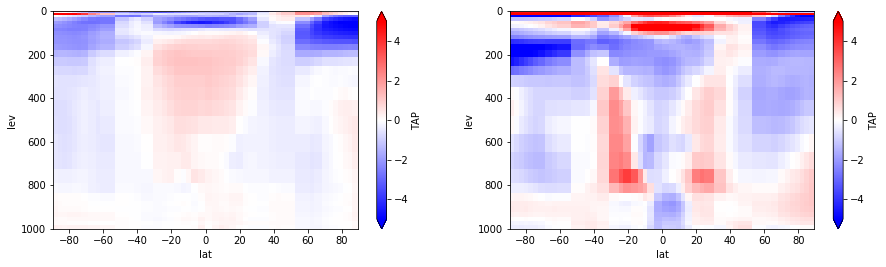

In [32]:
plot_mean_diff(TAPmeans, vmin=-5, vmax=5, cmap='bwr')

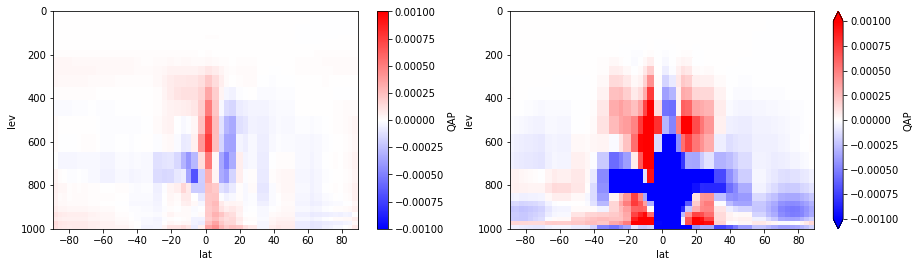

In [34]:
plot_mean_diff(QAPmeans, vmin=-1e-3, vmax=1e-3, cmap='bwr')

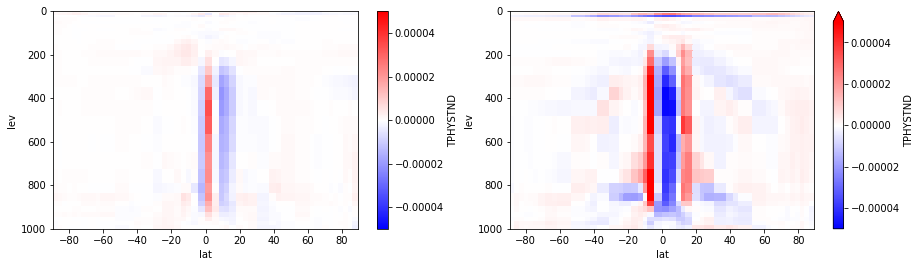

In [37]:
plot_mean_diff(TPHYSTNDmeans, vmin=-5e-5, vmax=5e-5, cmap='bwr')

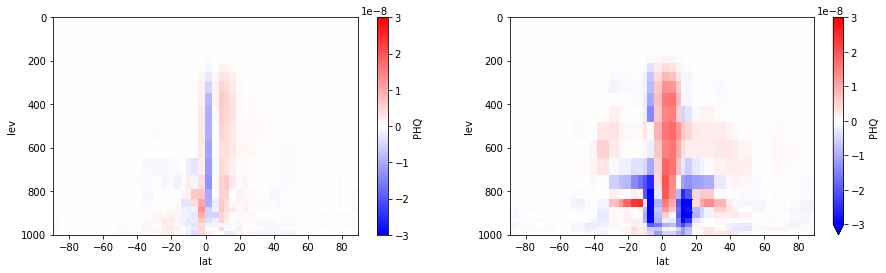

In [39]:
plot_mean_diff(PHQmeans, vmin=-3e-8, vmax=3e-8, cmap='bwr')

### Mean vertically integrated TPHYSTND (something like precip)

In [48]:
%time get_dP_from_ds(dcbrain).isel(time=200).compute()

CPU times: user 101 ms, sys: 581 ms, total: 681 ms
Wall time: 2.85 s


<xarray.DataArray (lev: 30, lat: 64, lon: 128)>
array([[[ 277.645234,  277.645234, ...,  277.645234,  277.645234],
        [ 277.645234,  277.645234, ...,  277.645234,  277.645234],
        ...,
        [ 277.645234,  277.645234, ...,  277.645234,  277.645234],
        [ 277.645234,  277.645234, ...,  277.645234,  277.645234]],

       [[ 512.625556,  512.625556, ...,  512.625556,  512.625556],
        [ 512.625556,  512.625556, ...,  512.625556,  512.625556],
        ...,
        [ 512.625556,  512.625556, ...,  512.625556,  512.625556],
        [ 512.625556,  512.625556, ...,  512.625556,  512.625556]],

       ...,

       [[1744.616755, 1744.73142 , ..., 1744.380352, 1744.499732],
        [1748.374447, 1748.737975, ..., 1747.661366, 1748.014118],
        ...,
        [1652.824647, 1652.723957, ..., 1653.036635, 1652.928199],
        [1652.495636, 1652.339045, ..., 1652.791813, 1652.646503]],

       [[1479.980651, 1480.059859, ..., 1479.817351, 1479.899815],
        [1482.576364, 1

In [50]:
hyai, hybi = dcbrain.hyai, dcbrain.hybi

In [52]:
P0 = dcbrain.P0

In [55]:
np.diff(np.arange(5)).shape

(4,)

In [71]:
P1 = P0 * hyai + dcbrain.isel(time=100)['PS'] * hybi

In [92]:
%time dP1 = np.diff(P0 * hyai + dcbrain.isel(time=100)['PS'] * hybi, axis=0)

CPU times: user 32.8 ms, sys: 486 ms, total: 519 ms
Wall time: 3.2 s


In [73]:
tmp = (dP1 - dP2)/(dP1+dP2)/2

In [76]:
dP = (dP1 + dP2)/2

In [77]:
dP.shape

(30, 64, 128)

In [78]:
x = dcbrain['TPHYSTND'].isel(time=48); x

<xarray.DataArray 'TPHYSTND' (lev: 30, lat: 64, lon: 128)>
dask.array<shape=(30, 64, 128), dtype=float32, chunksize=(30, 64, 128)>
Coordinates:
  * lat      (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 -71.16 ...
  * lon      (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 19.69 ...
  * lev      (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 87.82 ...
    time     float64 1.0
Attributes:
    units:        K/s
    long_name:    T physics tendency
    cell_method:  time: mean

In [83]:
def newvint(ds, var, factor, t):
    x = ds[var].isel(time=t).values
    return (dP * x * factor / G).sum(-3)

In [56]:
??get_P_from_ds

In [28]:
dcbrain['vintTPHYSTND'] = newvint(dcbrain, 'TPHYSTND', C_P)
dsp['vintTPHYSTND'] = newvint(dsp, 'TPHYSTND', C_P)
dnonsp['vintTPHYSTND'] = newvint(dnonsp, 'TPHYSTND', C_P)

In [87]:
%time tmp= newvint(dcbrain, 'TPHYSTND', C_P, sl)

CPU times: user 973 ms, sys: 691 ms, total: 1.66 s
Wall time: 2.1 s


In [88]:
tmp.shape

(270, 64, 128)

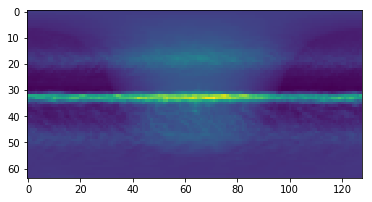

In [89]:
plt.imshow(tmp.mean(0))

In [90]:
dcbrain['vintTPHYSTND'] = xr.DataArray(tmp.mean(0), dims=('lat', 'lon'), name='vintTPHYSTNDmean')

In [91]:
dcbrain

<xarray.Dataset>
Dimensions:       (chars: 8, crm_x: 8, crm_y: 1, crm_z: 28, ilev: 31, isccp_prs: 7, isccp_prstau: 49, isccp_tau: 7, lat: 64, lev: 30, lon: 128, tbnd: 2, time: 14854)
Coordinates:
  * lat           (lat) float64 -87.86 -85.1 -82.31 -79.53 -76.74 -73.95 ...
  * lon           (lon) float64 0.0 2.812 5.625 8.438 11.25 14.06 16.88 ...
  * crm_x         (crm_x) float64 0.0 4.0 8.0 12.0 16.0 20.0 24.0 28.0
  * crm_y         (crm_y) float64 0.0
  * crm_z         (crm_z) float64 992.6 976.3 957.5 936.2 912.6 887.0 859.5 ...
  * lev           (lev) float64 3.643 7.595 14.36 24.61 38.27 54.6 72.01 ...
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 30.67 45.87 63.32 ...
  * isccp_prs     (isccp_prs) float64 90.0 245.0 375.0 500.0 620.0 740.0 900.0
  * isccp_tau     (isccp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 219.5
  * isccp_prstau  (isccp_prstau) float64 90.0 90.0 90.0 90.01 90.02 90.04 ...
  * time          (time) float64 0.0 0.02083 0.04167 0.0625 0.08333 0.1042 ..

In [43]:
%time a = dcbrain['vintTPHYSTND'].isel(time=48).compute()

CPU times: user 307 ms, sys: 1.22 s, total: 1.52 s
Wall time: 4.34 s


In [ ]:
plot_mean_diff(PHQmeans)

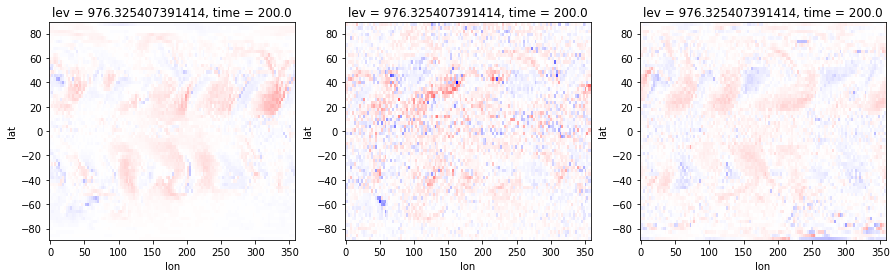

In [158]:
plot_comparison('TPHYSTND', 48*200, -2, vmin=-5e-4, vmax=5e-4, cmap='bwr')

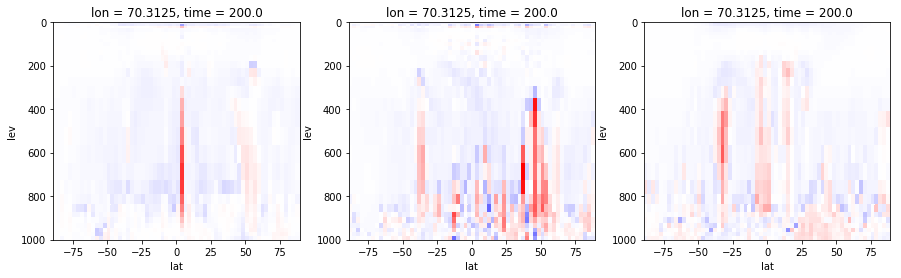

In [98]:
plot_comparison('TPHYSTND', 48*200, lon=25, vmin=-5e-4, vmax=5e-4, cmap='bwr', yincrease=False)

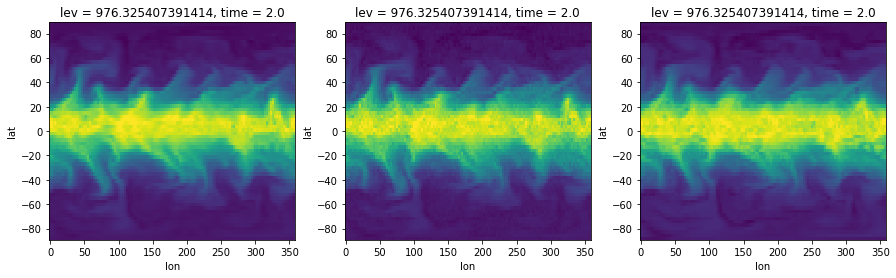

In [61]:
plot_comparison('QAP', 48*2, 28, vmax=0.02, vmin=0.002)

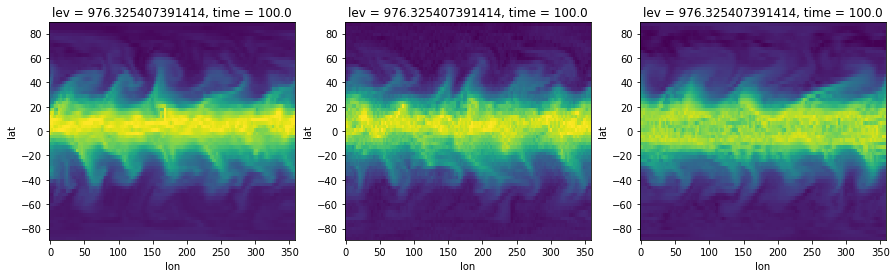

In [85]:
plot_comparison('QAP', 48*100, 28, vmax=0.02, vmin=0.002)

In [113]:
dcbrain['vintTPHYSTND'] = vint(dcbrain, 'TPHYSTND', C_P)
dsp['vintTPHYSTND'] = vint(dsp, 'TPHYSTND', C_P)
dnonsp['vintTPHYSTND'] = vint(dnonsp, 'TPHYSTND', C_P)

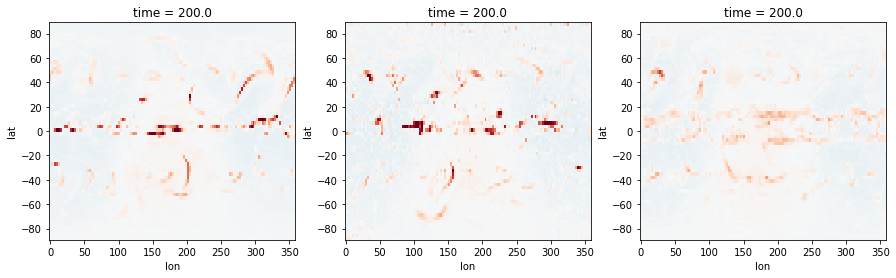

In [117]:
plot_comparison('vintTPHYSTND', 48*200, vmin=-3e3, vmax=3e3, cmap='RdBu_r')

In [118]:
dcbrain['vintTAP'] = vint(dcbrain, 'TAP', C_P)
dsp['vintTAP'] = vint(dsp, 'TAP', C_P)
dnonsp['vintTAP'] = vint(dnonsp, 'TAP', C_P)

In [119]:
dcbrain['gwvintTAP'] = gw_avg(dcbrain, 'vintTAP')
dsp['gwvintTAP'] = gw_avg(dsp, 'vintTAP')
dnonsp['gwvintTAP'] = gw_avg(dnonsp, 'vintTAP')

In [120]:
dcbrain['gwvintTAP']

<xarray.DataArray 'gwvintTAP' (time: 14854)>
dask.array<shape=(14854,), dtype=float64, chunksize=(48,)>
Coordinates:
  * time     (time) float64 0.0 0.02083 0.04167 0.0625 0.08333 0.1042 0.125 ...

KeyboardInterrupt: 

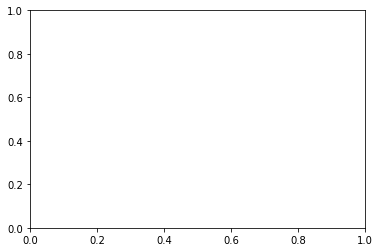

In [133]:
dcbrain['gwvintTAP'].isel(time=slice(1, None, 48*30)).plot(legend='CBRAIN')
dsp['gwvintTAP'].isel(time=slice(1, None, 48*30)).plot(legend='SP')
dnonsp['gwvintTAP'].isel(time=slice(1, None, 48*30)).plot(legend='nonSP')
plt.legend();

In [142]:
def mean_ts(ds): return (ds['TAP'].isel(lev=-1) * ds['gw'] / ds['gw'].mean()).mean(('lat', 'lon'))

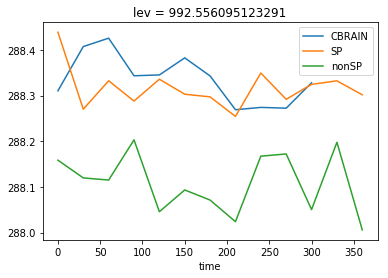

In [144]:
mean_ts(dcbrain.isel(time=slice(1, None, 48*30))).plot(label='CBRAIN')
mean_ts(dsp.isel(time=slice(1, None, 48*30))).plot(label='SP')
mean_ts(dnonsp.isel(time=slice(1, None, 48*30))).plot(label='nonSP')
plt.legend();

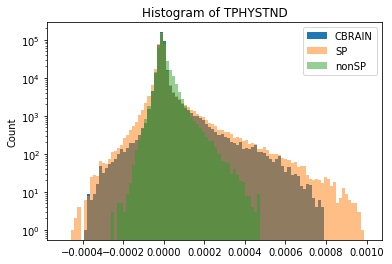

In [146]:
dcbrain['TPHYSTND'].isel(lev=20, time=range(48*2, 48*3)).plot(bins=100, range=(-5e-4, 10e-4), label='CBRAIN')
dsp['TPHYSTND'].isel(lev=20, time=range(48*2, 48*3)).plot(bins=100, range=(-5e-4, 10e-4), alpha=0.5, label='SP')
dnonsp['TPHYSTND'].isel(lev=20, time=range(48*2, 48*3)).plot(bins=100, range=(-5e-4, 10e-4), alpha=0.5, label='nonSP')
plt.gca().set_yscale('log'); plt.legend();

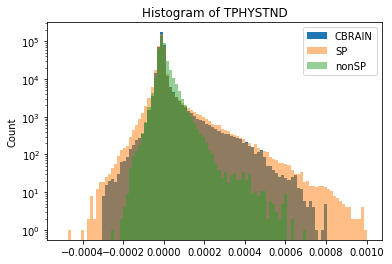

In [147]:
dcbrain['TPHYSTND'].isel(lev=20, time=range(48*202, 48*203)).plot(bins=100, range=(-5e-4, 10e-4), label='CBRAIN')
dsp['TPHYSTND'].isel(lev=20, time=range(48*202, 48*203)).plot(bins=100, range=(-5e-4, 10e-4), alpha=0.5, label='SP')
dnonsp['TPHYSTND'].isel(lev=20, time=range(48*202, 48*203)).plot(bins=100, range=(-5e-4, 10e-4), alpha=0.5, label='nonSP')
plt.gca().set_yscale('log'); plt.legend();

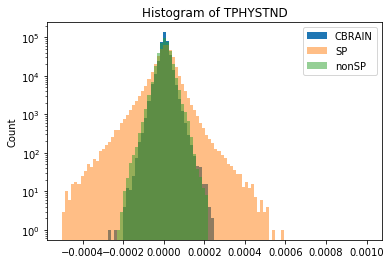

In [154]:
dcbrain['TPHYSTND'].isel(lev=-1, time=range(48*202, 48*203)).plot(bins=100, range=(-5e-4, 10e-4), label='CBRAIN')
dsp['TPHYSTND'].isel(lev=-1, time=range(48*202, 48*203)).plot(bins=100, range=(-5e-4, 10e-4), alpha=0.5, label='SP')
dnonsp['TPHYSTND'].isel(lev=-1, time=range(48*202, 48*203)).plot(bins=100, range=(-5e-4, 10e-4), alpha=0.5, label='nonSP')
plt.gca().set_yscale('log'); plt.legend();

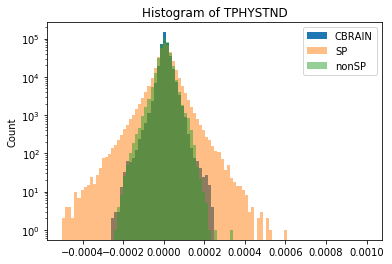

In [155]:
dcbrain['TPHYSTND'].isel(lev=-2, time=range(48*202, 48*203)).plot(bins=100, range=(-5e-4, 10e-4), label='CBRAIN')
dsp['TPHYSTND'].isel(lev=-2, time=range(48*202, 48*203)).plot(bins=100, range=(-5e-4, 10e-4), alpha=0.5, label='SP')
dnonsp['TPHYSTND'].isel(lev=-2, time=range(48*202, 48*203)).plot(bins=100, range=(-5e-4, 10e-4), alpha=0.5, label='nonSP')
plt.gca().set_yscale('log'); plt.legend();

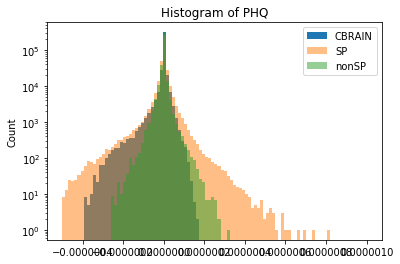

In [150]:
dcbrain['PHQ'].isel(lev=20, time=range(48*2, 48*3)).plot(bins=100, range=(-5e-7, 10e-7), label='CBRAIN')
dsp['PHQ'].isel(lev=20, time=range(48*2, 48*3)).plot(bins=100, range=(-5e-7, 10e-7), alpha=0.5, label='SP')
dnonsp['PHQ'].isel(lev=20, time=range(48*2, 48*3)).plot(bins=100, range=(-5e-7, 10e-7), alpha=0.5, label='nonSP')
plt.gca().set_yscale('log'); plt.legend();

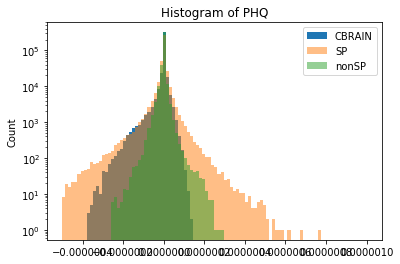

In [151]:
dcbrain['PHQ'].isel(lev=20, time=range(48*202, 48*203)).plot(bins=100, range=(-5e-7, 10e-7), label='CBRAIN')
dsp['PHQ'].isel(lev=20, time=range(48*202, 48*203)).plot(bins=100, range=(-5e-7, 10e-7), alpha=0.5, label='SP')
dnonsp['PHQ'].isel(lev=20, time=range(48*202, 48*203)).plot(bins=100, range=(-5e-7, 10e-7), alpha=0.5, label='nonSP')
plt.gca().set_yscale('log'); plt.legend();

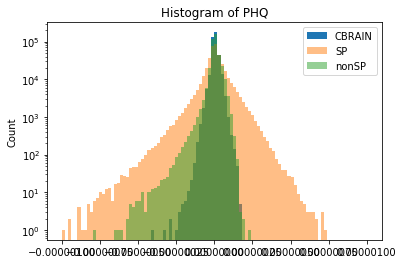

In [153]:
dcbrain['PHQ'].isel(lev=-1, time=range(48*202, 48*203)).plot(bins=100, range=(-10e-7, 10e-7), label='CBRAIN')
dsp['PHQ'].isel(lev=-1, time=range(48*202, 48*203)).plot(bins=100, range=(-10e-7, 10e-7), alpha=0.5, label='SP')
dnonsp['PHQ'].isel(lev=-1, time=range(48*202, 48*203)).plot(bins=100, range=(-10e-7, 10e-7), alpha=0.5, label='nonSP')
plt.gca().set_yscale('log'); plt.legend();

In [12]:
anim = animate_lat_lon(
    dcbrain['TPHYSTND'].isel(lev=20, time=range(0, 48*5, 4)), 
    125, vmin=-7e-4, vmax=7e-4, cmap='bwr'
)

In [14]:
HTML(anim.to_html5_video())

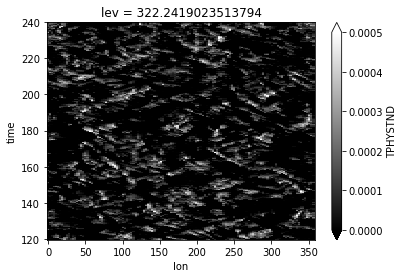

In [130]:
dsp['TPHYSTND'].isel(time=slice(120*48, 240*48, 24), lev=15).sel(lat=slice(-0, 10)).mean('lat').plot(
    cmap='gray',vmin=0, vmax=0.0005)

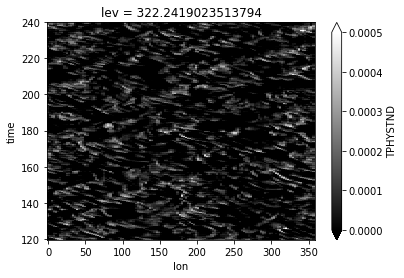

In [131]:
dcbrain['TPHYSTND'].isel(time=slice(120*48, 240*48, 24), lev=15).sel(lat=slice(-0, 10)).mean('lat').plot(
    cmap='gray',vmin=0, vmax=0.0005)

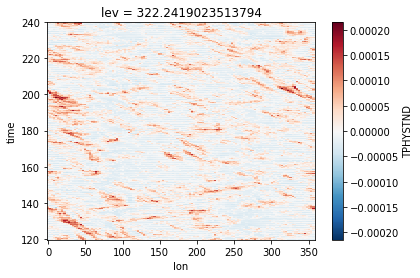

In [127]:
dnonsp['TPHYSTND'].isel(time=slice(120*48, 240*48, 24), lev=15).sel(lat=slice(0, 10)).mean('lat').plot()

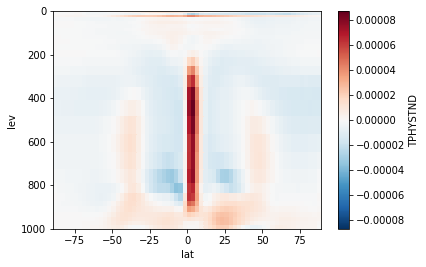

In [121]:
TPHYSTNDmeans[0].mean('lon').plot(yincrease=False)

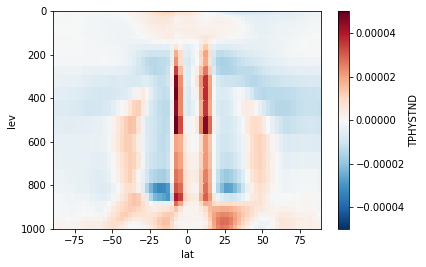

In [128]:
TPHYSTNDmeans[2].mean('lon').plot(yincrease=False)